In [1]:
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

In [2]:
df=pd.read_csv("Radar_Traffic_Counts (1).csv")

In [3]:
df.head()

,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume
0,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018,1,23,2,22,15,22:15,None,4
1,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.785660,2017,12,16,6,19,45,19:45,NB,103
2,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018,1,23,2,21,45,21:45,SB,44
3,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018,1,23,2,21,45,21:45,NB,13
4,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018,1,23,2,22,15,22:15,None,0


In [4]:
df.describe()

,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Volume
count,4.603861e+06,4.603861e+06,4.603861e+06,4.603861e+06,4.603861e+06,4.603861e+06,4.603861e+06,4.603861e+06,4.603861e+06
mean,3.029297e+01,-9.776093e+01,2.018196e+03,6.832604e+00,1.545778e+01,2.984037e+00,1.152842e+01,2.255114e+01,7.117196e+01
std,5.296973e-02,2.766680e-02,7.112473e-01,3.343380e+00,8.771197e+00,2.015474e+00,6.921682e+00,1.679781e+01,6.370984e+01
min,3.024047e+01,-9.781225e+01,2.017000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.025799e+01,-9.778566e+01,2.018000e+03,4.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,1.300000e+01
50%,3.026680e+01,-9.775605e+01,2.018000e+03,7.000000e+00,1.500000e+01,3.000000e+00,1.200000e+01,2.900000e+01,5.600000e+01
75%,3.033947e+01,-9.774603e+01,2.019000e+03,1.000000e+01,2.300000e+01,5.000000e+00,1.800000e+01,4.400000e+01,1.150000e+02
max,3.040229e+01,-9.771761e+01,2.019000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01,5.900000e+01,2.550000e+02


In [5]:
df.isna().sum()
#no na values


location_name         0
location_latitude     0
location_longitude    0
Year                  0
Month                 0
Day                   0
Day of Week           0
Hour                  0
Minute                0
Time Bin              0
Direction             0
Volume                0
dtype: int64

In [6]:
#dealing with categorical data
df[['location_name','Direction']]=df[['location_name','Direction']].applymap(lambda x: x.strip()) 
le = LabelEncoder() 
  
df['location_name']= le.fit_transform(df['location_name']) 
df['Direction']= le.fit_transform(df['Direction']) 


In [7]:
print(len(list(df.location_name.unique())))
print(list(df.Direction.unique()))

18
[2, 1, 3, 0, 4]


In [8]:
for i in ['location_name','location_latitude','location_longitude']:
    print(len(df[i].unique()))

18
18
18


In [9]:
df['date']=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [10]:
print('Min date from dataset: %s' % df['date'].min().date())
print('Max date from dataset: %s' % df['date'].max().date())

Min date from dataset: 2017-06-18
Max date from dataset: 2019-11-18


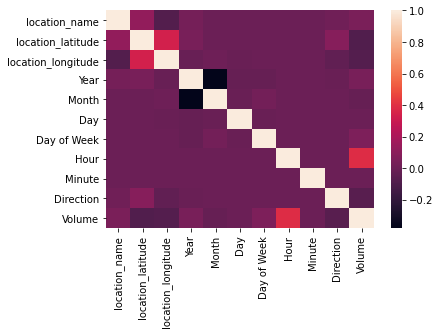

In [11]:
df.corr()
sns.heatmap(df.corr())


In [12]:
df[df['location_name']==1]
#we remark that every location have the same longitude and latitude
#then we will use only one of these three variables which is the location name

,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume,date
10,1,30.268652,-97.759929,2018,1,23,2,22,15,22:15,0,49,2018-01-23 22:15:00
11,1,30.268652,-97.759929,2018,1,23,2,22,15,22:15,0,47,2018-01-23 22:15:00
12,1,30.268652,-97.759929,2018,1,23,2,22,15,22:15,4,83,2018-01-23 22:15:00
13,1,30.268652,-97.759929,2018,1,23,2,22,15,22:15,4,107,2018-01-23 22:15:00
76,1,30.268652,-97.759929,2018,1,23,2,22,0,22:00,0,54,2018-01-23 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602931,1,30.268652,-97.759929,2019,5,7,2,23,15,23:15,0,25,2019-05-07 23:15:00
4602932,1,30.268652,-97.759929,2019,5,7,2,23,15,23:15,0,31,2019-05-07 23:15:00
4602933,1,30.268652,-97.759929,2019,5,7,2,23,15,23:15,4,60,2019-05-07 23:15:00
4602934,1,30.268652,-97.759929,2019,5,7,2,23,15,23:15,4,61,2019-05-07 23:15:00


In [13]:
df=df.drop(['location_longitude','location_latitude'],axis=1)

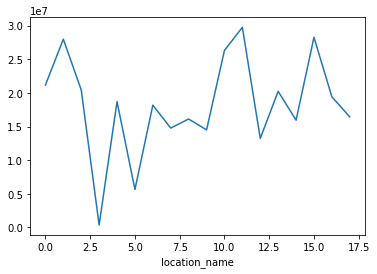

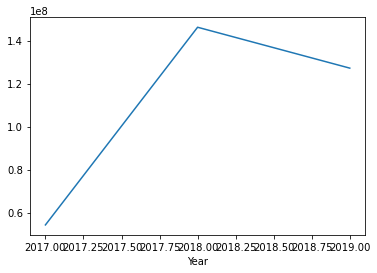

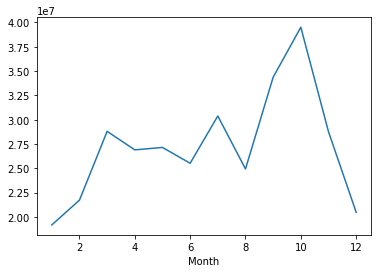

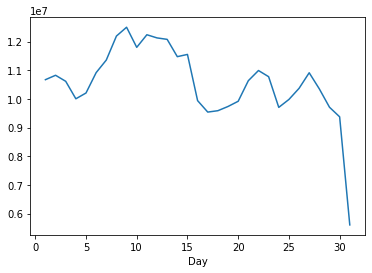

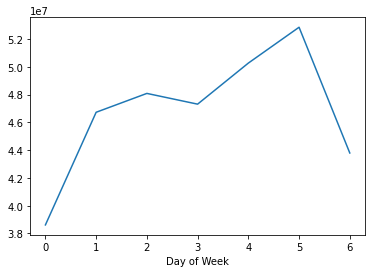

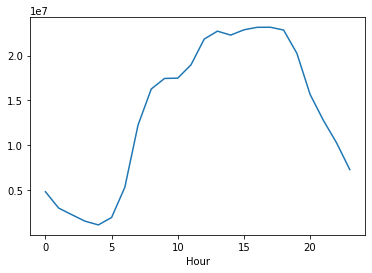

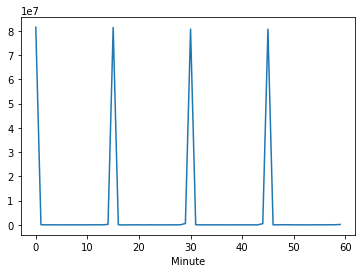

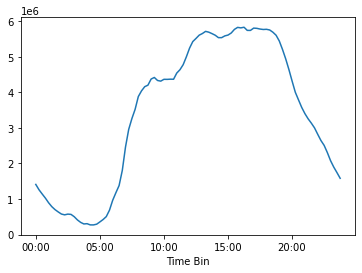

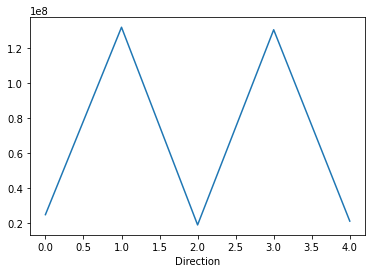

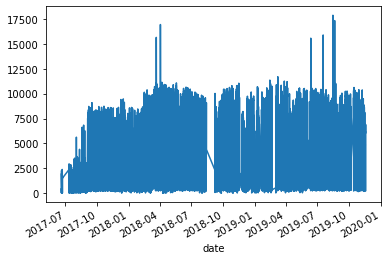

In [19]:
for i in list(df.columns):
    if i!='Volume':
        info_volume=df.groupby(i)['Volume'].sum()
        info_volume.reset_index()
        fig = plt.figure()
        info_volume.plot()
        plt.show()


In [14]:
class Dataset():
    def __init__(self, df):
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))
 
    def __len__(self):
        return len(self.X)
 
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    def get_splits(self, n_test=0.20):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])
    

In [16]:
def prepare_data(df):
    dataset = Dataset(df)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=100, shuffle=True)
    test_dl = DataLoader(test, batch_size=10, shuffle=False)
    return train_dl, test_dl

In [17]:
df=df[['location_name','Direction','Year','Month','Day','Day of Week','Hour','Volume']]

In [23]:
df

,location_name,Direction,Year,Month,Day,Day of Week,Hour,Volume
0,3,2,2018,1,23,2,22,4
1,10,1,2017,12,16,6,19,103
2,5,3,2018,1,23,2,21,44
3,5,1,2018,1,23,2,21,13
4,3,2,2018,1,23,2,22,0
...,...,...,...,...,...,...,...,...
4603856,13,1,2019,7,27,6,2,12
4603857,13,3,2019,5,29,3,22,58
4603858,13,3,2019,8,6,2,2,5
4603859,9,3,2019,9,26,4,10,16


In [18]:
train_dl, test_dl=prepare_data(df)
print(len(train_dl.dataset), len(test_dl.dataset))

3683089 920772


In [19]:

from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD #here we use stochastic gradient decent for optimazation
from torch.nn import MSELoss
from numpy import vstack
from torch.nn import Dropout2d
from torch import nn


In [20]:
class TIME_MLP(Module):
    # define model elements
    # i choose to construct a 3 layer neural network
    def __init__(self, n_inputs):
        super(TIME_MLP, self).__init__()
        self.l1 = Linear(n_inputs, 6)
        self.act1 = Sigmoid()
        self.l2 = Linear(6, 4)
        self.act2 = Sigmoid()
        self.l3 = Linear(4, 1)
    # forward propagate input
    def forward(self, X):
        X = self.l1(X)
        X = self.act1(X)
        X = self.l2(X)
        X = self.act2(X)
        X = self.l3(X)
        return X

In [25]:
class TIME_CNN(Module):
    def __init__(self):
        super(TIME_CNN, self).__init__()
        self.conv1 = nn.Conv1d(7, 64, (1,2), stride=10)
        self.pool = nn.MaxPool1d(kernel_size = (1, 2), stride = 2)

        self.fc1 = nn.Linear(64, 30)
        self.fc2 = nn.Linear(30, 7)

    def forward(self, x):
        x = x.view(64, 7, 1)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

In [118]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=7,hidden_size=100,num_layers=2,dropout=0.05)
        self.linear = nn.Linear(in_features=100, out_features=1)

    def reset_hidden_state(self):
        self.hidden = ( torch.zeros(2, 100, 100),
        torch.zeros(2, 100, 100) )
    
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(sequences.view(len(sequences), 100, -1),self.hidden )
        last_time_step = \
        lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [233]:
from torch.autograd import Variable
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.input_dim=7
        self.hidden_dim =100
        self.layer_dim = 1
        self.output_dim=1
        self.rnn = nn.RNN(self.input_dim, self.hidden_dim, self.layer_dim, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(self.hidden_dim, self.output_dim)
    
    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0),self.hidden_dim))
        x = x.view(100, 7, 1)
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [23]:
def train_model(train_dl, model):
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        lotot=0
        for i, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            lotot += loss.item()
            # credit assignment
            loss.backward( retain_graph=True)
            # update model weights
            optimizer.step()
        print("%d %f" % (epoch,lotot))


In [152]:
# evaluation
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
    
        # evaluate the model on the test set
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse

_______________________________TESTING MLP MODEL____________________________________

In [155]:
mlp=TIME_MLP(7)
train_model(train_dl, mlp)


0 150362301.434326
1 150326544.187744
2 150299702.791992
3 150302675.547119
4 150323085.844971
5 150285321.043213
6 150305540.657715
7 150319859.724365
8 150305834.263184
9 150289085.198486
10 150306595.746338
11 150303500.572998
12 150299399.782959
13 150293693.656738
14 150313594.997070
15 150296042.180176
16 150311566.363037
17 150345596.216064
18 150285432.075928
19 150279248.293457
20 150314577.379150
21 150299277.605225
22 150299370.682617
23 150306329.812256
24 150297278.064453
25 150299271.151611
26 150288853.404785
27 150310403.440674
28 150273770.421631
29 150314713.901855


KeyboardInterrupt: 

In [176]:
mlp=TIME_MLP(7)

evaluate_model(test_dl,mlp)

KeyboardInterrupt: 

___TESTING CNN MODEL____________________________________

In [26]:
cnn=TIME_CNN()
print(cnn)
train_model(train_dl, cnn)



TIME_CNN(
  (conv1): Conv1d(7, 64, kernel_size=(1, 2), stride=(10,))
  (pool): MaxPool1d(kernel_size=(1, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=7, bias=True)
)


RuntimeError: shape '[64, 7, 1]' is invalid for input of size 700

In [132]:
for i, (inputs, targets) in enumerate(test_dl):
    print(inputs.size())

torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])
torch.Size([10, 7])


KeyboardInterrupt: 

In [234]:
rnn=RNN()
rnn
train_model(train_dl,rnn)

RuntimeError: input.size(-1) must be equal to input_size. Expected 7, got 1

In [119]:
lstm=LSTM()
train_model(train_dl, lstm)


RuntimeError: shape '[100, 100, -1]' is invalid for input of size 700